<a href="https://colab.research.google.com/github/Library-of-jade/ds1-section-project/blob/main/AI_8_%EA%B9%80%EB%AF%BC%EC%84%9D_Section4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 손모양 인식

In [1]:
import numpy as np # data will be stored as numpy arrays
import os #handling directories
from PIL import Image #handling images
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg  #plotting

In [ ]:
!unzip "/content/drive/MyDrive/Bootcamp/archive.zip" -d "/content/drive/MyDrive/Bootcamp/"

Archive:  /content/drive/MyDrive/Bootcamp/archive.zip


In [2]:
lookup = dict()
reverselookup = dict()
count = 0

for j in os.listdir('/content/drive/MyDrive/Bootcamp/leapGestRecog/00/'):
  if not j.startswith('.'): 
    lookup[j] = count
    reverselookup[count] = j
    count = count + 1

lookup

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [3]:
x_data = []
y_data = []

datacount = 0 #the number of image

for i in range(0, 10):
  for j in os.listdir('/content/drive/MyDrive/Bootcamp/leapGestRecog/0' + str(i) + '/'):
    if not j.startswith('.'):
      count = 0
      for k in os.listdir('/content/drive/MyDrive/Bootcamp/leapGestRecog/0' + str(i) + '/' + j + '/'):
        img = Image.open('/content/drive/MyDrive/Bootcamp/leapGestRecog/0' + str(i) + '/' + j + '/' + k).convert('L') #Load image and change to grey scale

        img = img.resize((320, 120))
        arr = np.array(img)
        x_data.append(arr)
        count = count + 1
      y_value = np.full((count, 1), lookup[j])
      y_data.append(y_value)
      datacount = datacount + count


x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1)


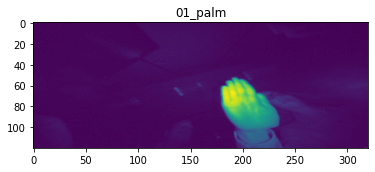

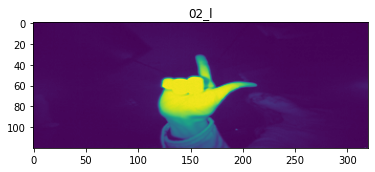

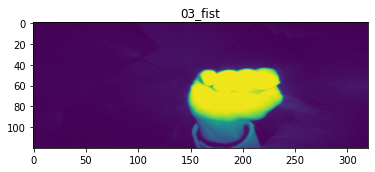

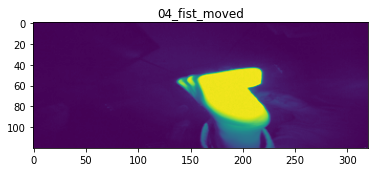

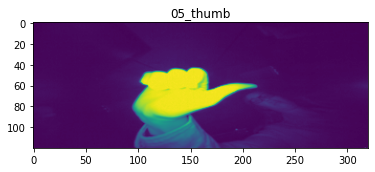

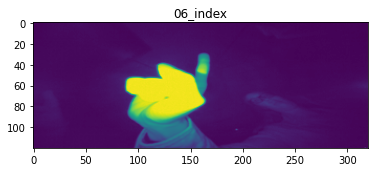

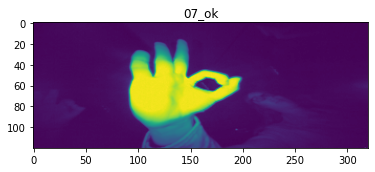

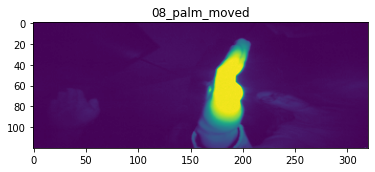

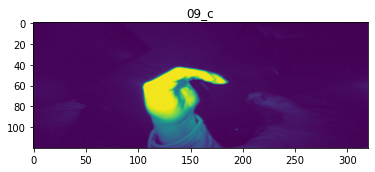

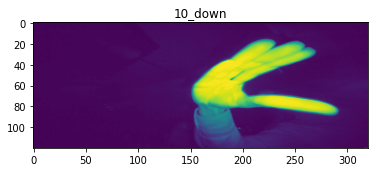

In [4]:
from random import randint
for i in range(0, 10):
  plt.imshow(x_data[i*200, :, :])
  plt.title(reverselookup[y_data[i*200 ,0]])
  plt.show()

In [5]:
import tensorflow.keras
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(y_data)

In [6]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_further, y_train, y_further = train_test_split(x_data, y_data, test_size = 0.2)
x_validate, x_test, y_validate, y_test = train_test_split(x_further, y_further, test_size = 0.5)


In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/10
250/250 [==============================] - 23s 43ms/step - loss: 0.3125 - accuracy: 0.9016 - val_loss: 0.0207 - val_accuracy: 0.9955
Epoch 2/10
250/250 [==============================] - 10s 40ms/step - loss: 0.0211 - accuracy: 0.9954 - val_loss: 0.1113 - val_accuracy: 0.9705
Epoch 3/10
250/250 [==============================] - 10s 40ms/step - loss: 0.0116 - accuracy: 0.9980 - val_loss: 0.0126 - val_accuracy: 0.9970
Epoch 4/10
250/250 [==============================] - 10s 40ms/step - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.0047 - val_accuracy: 0.9995
Epoch 5/10
250/250 [==============================] - 10s 40ms/step - loss: 0.0068 - accuracy: 0.9991 - val_loss: 0.0041 - val_accuracy: 0.9990
Epoch 6/10
250/250 [==============================] - 10s 40ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0051 - val_accuracy: 0.9985
Epoch 7/10
250/250 [==============================] - 10s 40ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy:

In [11]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 [==============================] - 1s 10ms/step - loss: 1.8000e-08 - accuracy: 1.0000
Accuracy:1.0
